In [64]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
                                                                    
# import functions from the modsim.py module
from modsim import *

**Stocks:** Elk (X), Wolves (Y)

**Parameters:** Elk BR (Alpha), Elk DR (Beta), Wolf BR (Delta), Wolf DR (Gamma)

**Differential Equations:**

dX/dt = Alpha\*X - Beta\*X\*Y

dY/dt = Delta\*X\*Y - Gamma\*Y

In [57]:
X0    = 1.0
Y0    = 1.0
A0    = 0.05
B0    = 0.1
G0    = 0.1
D0    = 0.1
T_0   = 0
T_END = 200

200

In [58]:
def make_system(a, b, d, g):
    i = State(X = X0, Y = Y0);

    return System(alpha = a,
                  beta  = b,
                  delta = d,
                  gamma = g,
                  init  = i,
                  t_0   = T_0,
                  t_end = T_END);

In [59]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    
    for t in linrange(t_0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [60]:
def update(state, t, system):
    unpack(system)
    unpack(state)
    
    x,y = state
    
    dX = alpha*x - beta*x*y
    dY = delta*x*y - gamma*y
    
    x += dX
    y += dY
    
    return State(X=x, Y=y)

In [61]:
def plot_results(X, Y):
    plot(X, '--', label='Elk')
    plot(Y, '-',  label='Wolves')
    decorate(xlabel='Time (days)',
             ylabel='Population')

alpha                                0.05
beta                                  0.1
delta                                 0.1
gamma                                 0.1
init     X    1.0
Y    1.0
dtype: float64
t_0                                     0
t_end                                 200
dtype: object


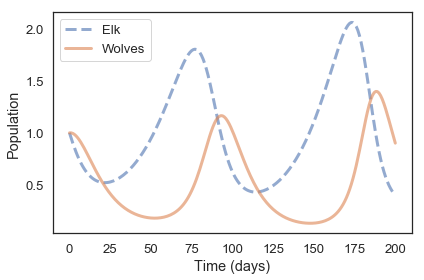

In [62]:
sys = make_system(A0, B0, D0, G0)
results = run_simulation(sys, update)
plot_results(results.X, results.Y)
print(sys)

# 